In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

In [3]:
#!f2py3 -c nufft3df90.pyf dfftpack.f next235.f nufft3df90.f

In [4]:
from Poisson_Cyl_Sphere import Poisson_Cyl_Sphere as p_solver

In [5]:
rho = 10.0                    ## density inside sphere
R0  = 0.4                     ## radius of sphere
NN  = 128                     ## resolution
x0, y0, z0 = 0.0, -1.5, 0.5   ## center of the sphere

In [14]:
#convl_sphere = p_solver(rho=rho, R0=R0, x0=x0, y0=y0, z0=z0, NN=NN, method="convolution")
nufft_sphere = p_solver(rho=rho, R0=R0, x0=x0, y0=y0, z0=z0, NN=NN, method="nufft")

In [15]:
#help(nufft_sphere)

In [13]:
convl_potential = convl_sphere.solve()

In [14]:
convl_analytic  = convl_sphere.analytic_sol()
convl_error     = convl_sphere.error()
convl_error_rel = convl_error/convl_analytic
convl_L1        = convl_sphere.L1_error()
print(convl_L1)

0.00014482976844387005


In [ ]:
nufft_potential = nufft_sphere.solve()

In [8]:
nufft_analytic  = nufft_sphere.analytic_sol()
nufft_error     = nufft_sphere.error()
nufft_error_rel = nufft_error/nufft_analytic
nufft_L1        = nufft_sphere.L1_error()
print(nufft_L1)

0.0002645863120242433


In [9]:
crt_x1, crt_x2, crt_x3 = nufft_sphere.get_crt_coord()

Text(0.5,0.98,'N = 96')

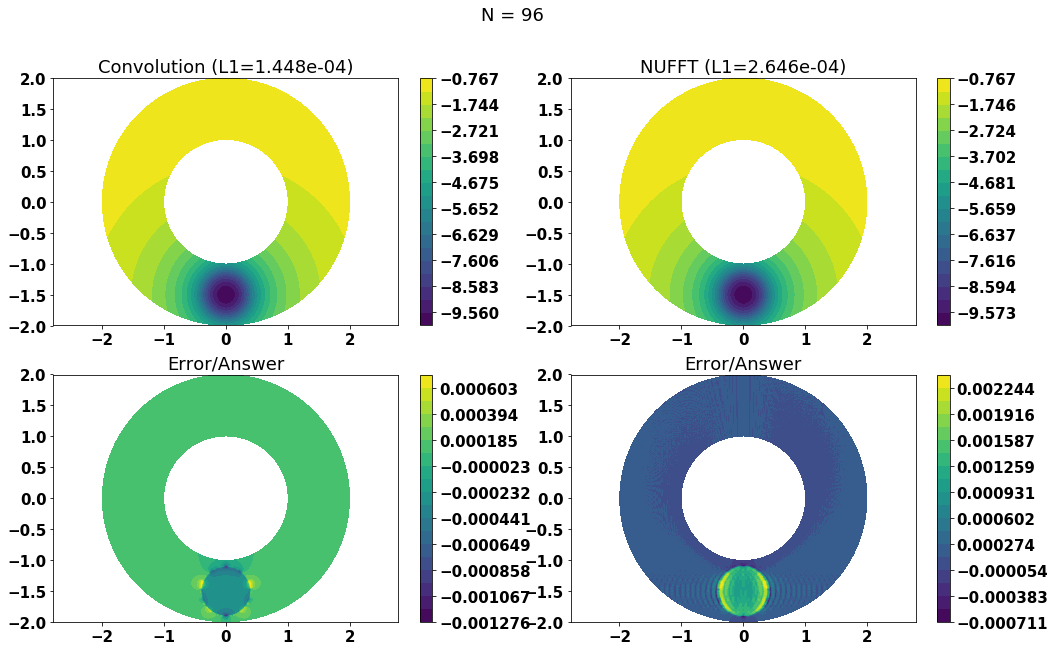

In [15]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution (L1=" + format(convl_L1, ".3e") + ")")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("NUFFT (L1=" + format(nufft_L1, ".3e") + ")")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error_rel[:,:,plan], 
             levels=np.linspace(np.min(nufft_error_rel[:,:,plan]), np.max(nufft_error_rel[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN))

In [6]:
convl_resolution = [16, 32, 64, 96, 128]
convl_L1_list = [0.009499275840549664, 0.0019270025002355016, 0.0006311646781134478, 0.00014482976844387005, 5.415054999316211e-05]

In [7]:
nufft_resolution = [16, 32, 64, 96]
nufft_L1_list = [0.011680560012341103,  0.003275155943067629, 0.0007546821533309399, 0.0002645863120242433]

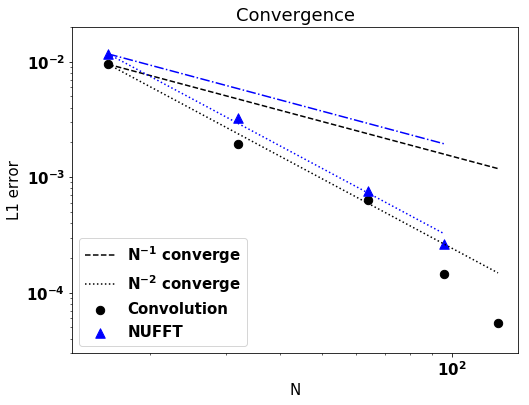

In [9]:
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(8, 6))


plt.scatter(convl_resolution, convl_L1_list, color='k', marker="o", s=70, label="Convolution")
plt.scatter(nufft_resolution, nufft_L1_list, color='b', marker="^", s=90, label="NUFFT")

plt.plot([convl_resolution[0], convl_resolution[-1]],
         [convl_L1_list[0], convl_L1_list[0]*(convl_resolution[-1]/convl_resolution[0])**(-1.0)], 
         linestyle="--", color="k", label=r"N$^{-1}$ converge")

plt.plot([convl_resolution[0], convl_resolution[-1]],
         [convl_L1_list[0], convl_L1_list[0]*(convl_resolution[-1]/convl_resolution[0])**(-2.0)], 
         linestyle=":", color="k", label=r"N$^{-2}$ converge")

plt.plot([nufft_resolution[0], nufft_resolution[-1]],
         [nufft_L1_list[0], nufft_L1_list[0]*(nufft_resolution[-1]/nufft_resolution[0])**(-1.0)], 
         linestyle="-.", color="b")

plt.plot([nufft_resolution[0], nufft_resolution[-1]],
         [nufft_L1_list[0], nufft_L1_list[0]*(nufft_resolution[-1]/nufft_resolution[0])**(-2.0)], 
         linestyle=":", color="b")


plt.xscale("log")
plt.yscale("log")

plt.ylim(3e-5, 2e-2)

plt.title("Convergence")

plt.xlabel("N")
plt.ylabel("L1 error")

plt.legend(loc="best", fontsize=15)

Text(0.5,0.98,'N = 128, L1 = 5.415054999316211e-05')

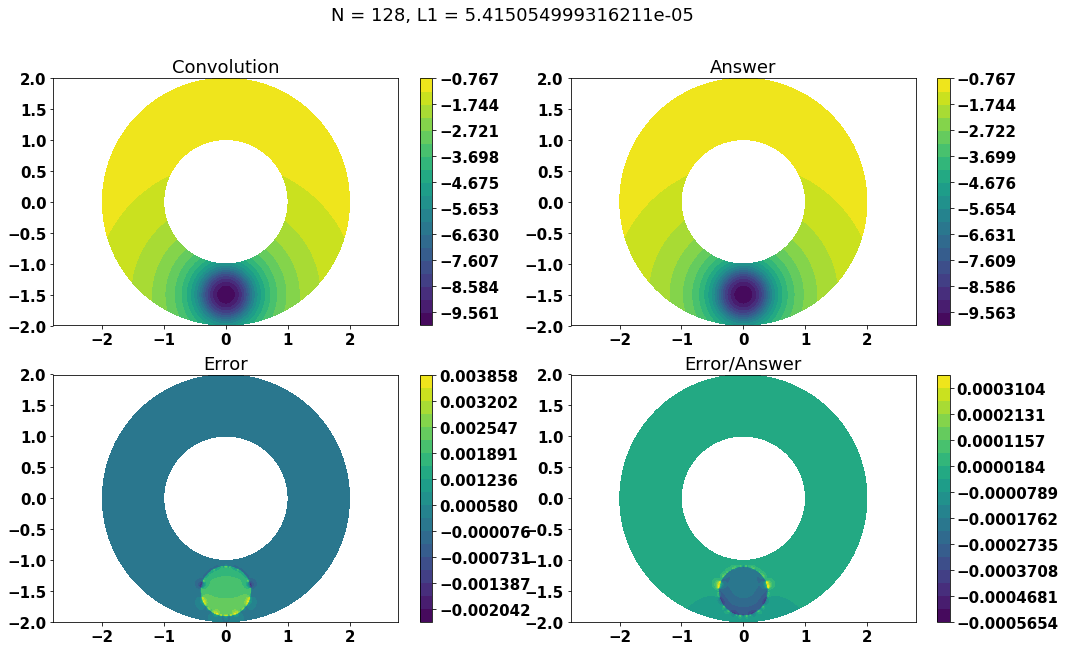

In [11]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error[:,:,plan], 
             levels=np.linspace(np.min(convl_error[:,:,plan]), np.max(convl_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(convl_L1))

Text(0.5,0.98,'N = 96, L1 = 0.0002645863120242433')

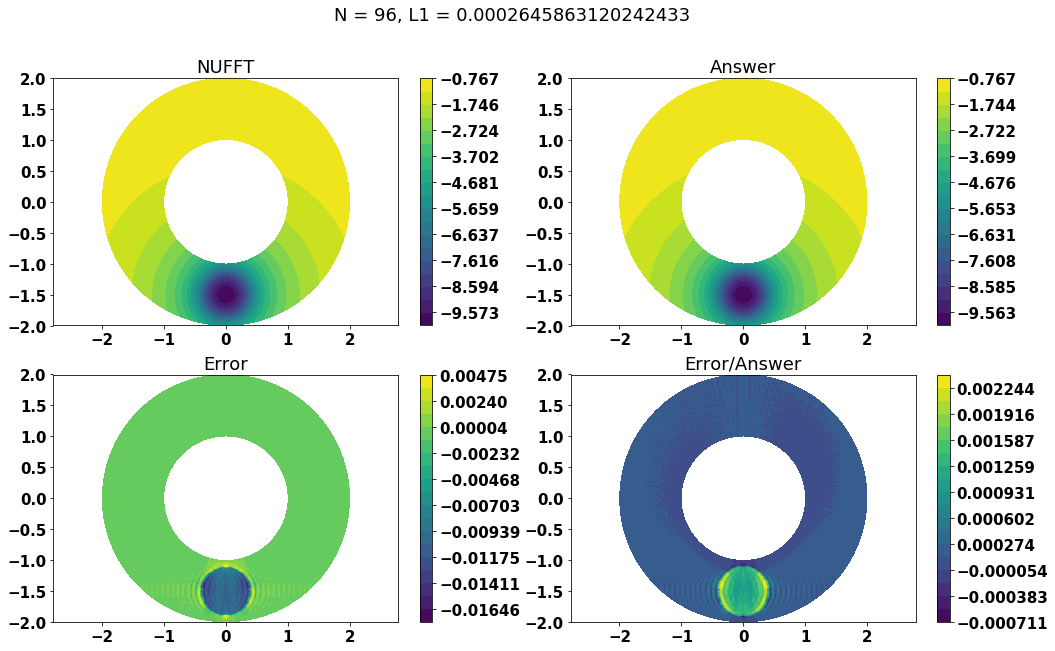

In [10]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_potential[:,:,plan], 
             levels=np.linspace(np.min(nufft_potential[:,:,plan]), np.max(nufft_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("NUFFT")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_analytic[:,:,plan], 
             levels=np.linspace(np.min(nufft_analytic[:,:,plan]), np.max(nufft_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error[:,:,plan], 
             levels=np.linspace(np.min(nufft_error[:,:,plan]), np.max(nufft_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], nufft_error_rel[:,:,plan], 
             levels=np.linspace(np.min(nufft_error_rel[:,:,plan]), np.max(nufft_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(nufft_L1))